In [44]:
# import libraries used:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag, ne_chunk

import spacy
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

from nltk.util import bigrams
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Task 1:
### a. Implement POS tagging and identify Named Entity on the given text using:
#### 1. Nltk
#### 2. Spacy

In [2]:
sample_text = "SpaCy is a powerful library for natural language processing (NLP) in Python. It provides pre-trained models for various languages, including English, and allows you to perform tasks such as tokenization, part-of-speech tagging, named entity recognition, and more. SpaCy is known for its speed and efficiency, making it a popular choice for NLP tasks in both research and industry.In addition to its core features, spaCy also offers support for customizing and training models, which can be useful when working with specialized domains or languages. The spaCy library has a user-friendly API that makes it easy to integrate into your NLP workflows.For example, you can use spaCy to analyze text documents, extract meaningful information, and gain insights from textual data. Whether you're working on sentiment analysis, text classification, or information extraction, spaCy can be a valuable tool in your NLP toolkit.To get started with spaCy, you can install it using pip and then load the language model of your choice. Once you have spaCy up and running, you can start experimenting with various NLP tasks and techniques. Happy experimenting!"

In [3]:
sample_text # On which we will be performing POS Tagging and NER using both methods

"SpaCy is a powerful library for natural language processing (NLP) in Python. It provides pre-trained models for various languages, including English, and allows you to perform tasks such as tokenization, part-of-speech tagging, named entity recognition, and more. SpaCy is known for its speed and efficiency, making it a popular choice for NLP tasks in both research and industry.In addition to its core features, spaCy also offers support for customizing and training models, which can be useful when working with specialized domains or languages. The spaCy library has a user-friendly API that makes it easy to integrate into your NLP workflows.For example, you can use spaCy to analyze text documents, extract meaningful information, and gain insights from textual data. Whether you're working on sentiment analysis, text classification, or information extraction, spaCy can be a valuable tool in your NLP toolkit.To get started with spaCy, you can install it using pip and then load the language

In [4]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

#### 1. Nltk method:

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# Tokenize the text into sentences and words
sentences = sent_tokenize(sample_text)
words = [word_tokenize(sentence) for sentence in sentences]

In [15]:
# Performing POS tagging
pos_tags = [pos_tag(word) for word in words]

In [16]:
# Performing NER
ner_tags = [ne_chunk(pos_tag(word)) for word in words]

In [17]:
# Print the results
for i, sentence in enumerate(sentences):
    print(f"Sentence {i+1}:")
    print("POS Tags:")
    print(pos_tags[i])
    print()
    print("Named Entities:")
    print(ner_tags[i])
    print("\n")

Sentence 1:
POS Tags:
[('SpaCy', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('powerful', 'JJ'), ('library', 'NN'), ('for', 'IN'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), ('(', '('), ('NLP', 'NNP'), (')', ')'), ('in', 'IN'), ('Python', 'NNP'), ('.', '.')]

Named Entities:
(S
  (GPE SpaCy/NNP)
  is/VBZ
  a/DT
  powerful/JJ
  library/NN
  for/IN
  natural/JJ
  language/NN
  processing/NN
  (/(
  (ORGANIZATION NLP/NNP)
  )/)
  in/IN
  (GPE Python/NNP)
  ./.)


Sentence 2:
POS Tags:
[('It', 'PRP'), ('provides', 'VBZ'), ('pre-trained', 'JJ'), ('models', 'NNS'), ('for', 'IN'), ('various', 'JJ'), ('languages', 'NNS'), (',', ','), ('including', 'VBG'), ('English', 'NNP'), (',', ','), ('and', 'CC'), ('allows', 'VBZ'), ('you', 'PRP'), ('to', 'TO'), ('perform', 'VB'), ('tasks', 'NNS'), ('such', 'JJ'), ('as', 'IN'), ('tokenization', 'NN'), (',', ','), ('part-of-speech', 'JJ'), ('tagging', 'NN'), (',', ','), ('named', 'VBN'), ('entity', 'NN'), ('recognition', 'NN'), (',', ','), ('and',

#### 2. Spacy method:

In [18]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [19]:
# Process the text with spaCy
doc = nlp(sample_text)

# Perform POS tagging
pos_tags = [(token.text, token.pos_) for token in doc]

# Perform NER
ner_tags = [(ent.text, ent.label_) for ent in doc.ents]

In [20]:
# Printing the results
print("POS Tags:")
print(pos_tags)
print()
print("\nNamed Entities:")
print(ner_tags)

POS Tags:
[('SpaCy', 'PROPN'), ('is', 'AUX'), ('a', 'DET'), ('powerful', 'ADJ'), ('library', 'NOUN'), ('for', 'ADP'), ('natural', 'ADJ'), ('language', 'NOUN'), ('processing', 'NOUN'), ('(', 'PUNCT'), ('NLP', 'PROPN'), (')', 'PUNCT'), ('in', 'ADP'), ('Python', 'PROPN'), ('.', 'PUNCT'), ('It', 'PRON'), ('provides', 'VERB'), ('pre', 'ADJ'), ('-', 'ADJ'), ('trained', 'VERB'), ('models', 'NOUN'), ('for', 'ADP'), ('various', 'ADJ'), ('languages', 'NOUN'), (',', 'PUNCT'), ('including', 'VERB'), ('English', 'PROPN'), (',', 'PUNCT'), ('and', 'CCONJ'), ('allows', 'VERB'), ('you', 'PRON'), ('to', 'PART'), ('perform', 'VERB'), ('tasks', 'NOUN'), ('such', 'ADJ'), ('as', 'ADP'), ('tokenization', 'NOUN'), (',', 'PUNCT'), ('part', 'NOUN'), ('-', 'PUNCT'), ('of', 'ADP'), ('-', 'PUNCT'), ('speech', 'NOUN'), ('tagging', 'NOUN'), (',', 'PUNCT'), ('named', 'VERB'), ('entity', 'NOUN'), ('recognition', 'NOUN'), (',', 'PUNCT'), ('and', 'CCONJ'), ('more', 'ADJ'), ('.', 'PUNCT'), ('SpaCy', 'PROPN'), ('is', 'AUX

# Task 2:
### b.	To select a dataset from real world example having reviews of any firm/product/books/hotel reviews etc and perform the following tasks
#### i.	Remove the noise (stopwords, puctuations) for the predictor columns
#### ii	Create features such as total word length, number of unique words, number of bigrams
#### iii	Create features for POS tags and named entity tags


In [22]:
df = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")

### i.	Remove the noise (stopwords, puctuations) for the predictor columns

In [25]:
def preprocess_text(text):
    if isinstance(text, str): # If the text at a given instane is of the string tyoe
        stop_words = set(stopwords.words('english'))
        text = text.lower()  # Convert to lowercase
        text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        return ' '.join(tokens)
    else:
        return ''  # Handle NaN values by returning an empty string

# Apply preprocessing to the 'Review Text' column
df['cleaned_review'] = df['Review Text'].apply(preprocess_text)


### ii. Create features such as total word length, number of unique words, number of bigrams

In [26]:
# Function to calculate total word length, unique words, and bigrams
def create_features(text):
    tokens = text.split()
    total_word_length = len(tokens)
    unique_words = len(set(tokens)) # We cannot have duplicate elements in set.
    bigram_list = list(bigrams(tokens))
    bigram_count = len(bigram_list)
    return total_word_length, unique_words, bigram_count

# Apply feature extraction to the 'cleaned_review' column
df['total_word_length'], df['unique_words'], df['bigram_count'] = zip(*df['cleaned_review'].apply(create_features))

print(df[['total_word_length', 'unique_words', 'bigram_count']])


       total_word_length  unique_words  bigram_count
0                      5             5             4
1                     31            26            30
2                     48            42            47
3                     14            12            13
4                     16            15            15
...                  ...           ...           ...
23481                 11            11            10
23482                 24            24            23
23483                 19            18            18
23484                 38            37            37
23485                 11            11            10

[23486 rows x 3 columns]


### iii. Create features for POS tags and named entity tags

In [27]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract POS tags and named entities
def extract_pos_ner(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]
    named_entities = [ent.label_ for ent in doc.ents]
    return pos_tags, named_entities

# Apply feature extraction to the 'cleaned_review' column
df['pos_tags'], df['named_entities'] = zip(*df['cleaned_review'].apply(extract_pos_ner))

print(df[['pos_tags', 'named_entities']])


                                                pos_tags        named_entities
0                              [ADV, ADJ, ADJ, ADJ, ADJ]                    []
1      [NOUN, NOUN, NOUN, ADV, VERB, VERB, NOUN, PRON...            [CARDINAL]
2      [ADJ, NOUN, NOUN, ADV, VERB, NOUN, ADV, VERB, ...  [CARDINAL, CARDINAL]
3      [NOUN, PROPN, PROPN, NOUN, NOUN, NOUN, ADJ, DE...                    []
4      [NOUN, VERB, ADJ, ADJ, ADJ, NOUN, ADJ, NOUN, N...                    []
...                                                  ...                   ...
23481  [ADJ, PROPN, VERB, ADJ, NOUN, ADJ, NOUN, ADJ, ...                    []
23482  [VERB, NOUN, NOUN, ADJ, ADJ, ADJ, NOUN, NOUN, ...            [CARDINAL]
23483  [VERB, ADV, ADJ, VERB, ADV, AUX, VERB, PRON, V...                    []
23484  [VERB, NOUN, NOUN, NOUN, NOUN, ADV, ADJ, AUX, ...                [DATE]
23485  [VERB, ADJ, NOUN, NOUN, VERB, ADV, ADJ, NOUN, ...                    []

[23486 rows x 2 columns]


# Part B:
## Movie Review Sentiment Classification Using Naive Bayes with 80-20 Training Split



In [82]:
# import dataset
df1 = pd.read_csv('/content/IMDB Dataset.csv', error_bad_lines=False, engine="python")

<ipython-input-82-ccb062b51fc7>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv('/content/IMDB Dataset.csv', error_bad_lines=False, engine="python")


#### Performing Basic EDA on the dataset:

In [83]:
df1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [85]:
df1.describe().T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,positive,25000


In [86]:
df1['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

### We can conclude that we have a balanced dataset from the above review ratio distribution.

### Seeing the most used words among the reviews found in the dataset.

In [88]:
dt = pd.DataFrame(dt)
dt['sentiment']=df1['sentiment']
dt

,text,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [92]:
df1['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<Axes: >

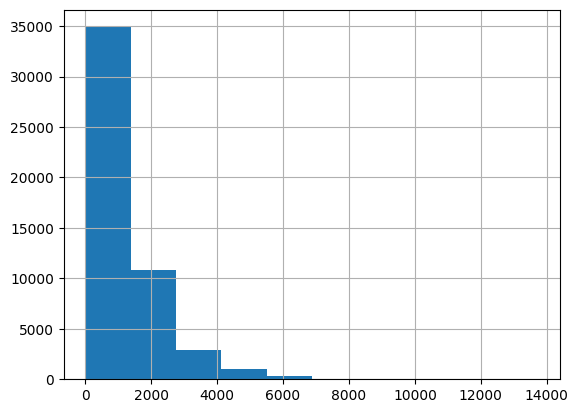

In [93]:
df1['review'].str.len().hist()

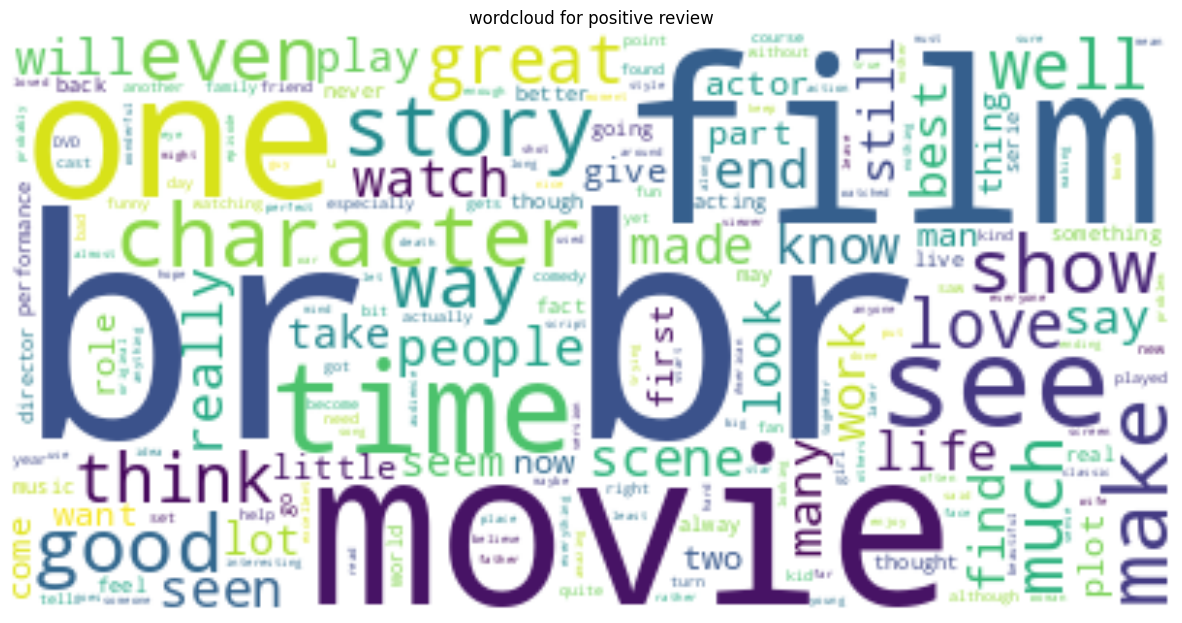

In [96]:
text = " ".join(i for i in df1[df1['sentiment']=='positive']['review'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

In [97]:
df1.rename(columns={'review':'text'}, inplace = True)
df1

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [99]:
df1['sentiment']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [100]:
dt = pd.DataFrame(dt)
dt['sentiment']=df1['sentiment']
dt

,text,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [105]:
# remove stop word:
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [107]:
dt['no_sw'].loc[5]

'probably alltime favorite movie story selflessness sacrifice dedication noble preachy boring despite times years paul lukas performance brings tears eyes bette davis sympathetic roles delight kids grandma dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd movie'

In [118]:
nb=dt.drop(columns=['text','no_sw'])
nb.columns=['sentiment','review']
nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]
nb

,sentiment,review
0,1,reviewers mentioned watching oz episode youll ...
1,1,wonderful production filming technique unassum...
2,1,wonderful spend time hot summer weekend sittin...
3,0,basically family boy jake thinks zombie closet...
4,1,petter matteis love time money visually stunni...
...,...,...
49995,1,movie job creative original expecting lotta fu...
49996,0,plot dialogue acting idiotic directing annoyin...
49997,0,catholic taught parochial elementary schools n...
49998,0,disagree previous comment side maltin rate exc...


### Train test split

In [124]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

## Naive Bayes

In [125]:
    from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 86.13%
------------------------------------------------
Confusion Matrix:
      0     1
0  4332   645
1   742  4281
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4977
           1       0.87      0.85      0.86      5023

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Conclusion

In this experiment, we achieved our aim of exploring POS tagging and Named Entity Recognition (NER). We learned to tag parts of speech and identify named entities using NLTK and spaCy.
